## Maldist Model

Here we are going to follow the Maldist model by dividing the dataset into 4 classes Benign, Dridex, Emotet and Hacintor
But first we need to balanced the data
After that we can train our several models and compare their Accuracy, Precision, Recall and F1-Score
Then we can do a confussion matrix

We are going to balanced the data by subsampling hancitor and oversampling the rest. Our media samples will be 7000

In [1]:
import pandas as pd
import numpy as np

dridex = pd.read_csv("../Datasets/Dridex.csv", sep=",")
emotet = pd.read_csv("../Datasets/Emotet.csv", sep=",")
hancitor = pd.read_csv("../Datasets/Hancitor.csv", sep=",")
valak = pd.read_csv("../Datasets/Valak.csv", sep=",")
benign = pd.read_csv("../Datasets/Benign.csv", sep=",")

print(f"The shape of the dridex dataset is {dridex.shape[0]} samples, {dridex.shape[1]} features")
print(f"The shape of the emotet dataset is {emotet.shape[0]} samples, {emotet.shape[1]} features")
print(f"The shape of the hancitor dataset is {hancitor.shape[0]} samples, {hancitor.shape[1]} features")
print(f"The shape of the valak dataset is {valak.shape[0]} samples, {valak.shape[1]} features")
print(f"The shape of the benign dataset is {benign.shape[0]} samples, {benign.shape[1]} features")

The shape of the dridex dataset is 1987 samples, 337 features
The shape of the emotet dataset is 5597 samples, 337 features
The shape of the hancitor dataset is 58431 samples, 337 features
The shape of the valak dataset is 1151 samples, 337 features
The shape of the benign dataset is 3050 samples, 337 features


In [2]:
data = pd.read_csv("../Datasets/MalDist_Dataset.csv", sep=",")

mal = data[data['label'] == 1].drop(columns=['label'])
legit = data[data['label'] == 0].drop(columns=['label'])

print(f"The shape of the legit dataset is {legit.shape[0]} samples, {legit.shape[1]} features")
print(f"The shape of the mal dataset is {mal.shape[0]} samples, {mal.shape[1]} features")

The shape of the legit dataset is 3050 samples, 336 features
The shape of the mal dataset is 67166 samples, 336 features


In [8]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [3]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
import pandas as pd

# Separar características y etiquetas
X = data.drop(columns=['label', 'family', 'file_name'])
y = data['family']

# Tamaño objetivo de las clases balanceadas
target_class_size = 7000  

# Submuestreo para Hacintor
subsampled_dfs = []
for label in y.unique():
    class_data = data[data['family'] == label]
    if len(class_data) > target_class_size:
        print(f"Submuestreo {label}")
        subsampled_class = resample(class_data, 
                                    replace=False, 
                                    n_samples=target_class_size, 
                                    random_state=42)
        subsampled_dfs.append(subsampled_class)
    else:
        subsampled_dfs.append(class_data)

# Combinar datos submuestreados
balanced_df = pd.concat(subsampled_dfs)

# Sobremuestreo para clases muy pequeñas
X_balanced = balanced_df.drop(columns=['label', 'family', 'file_name'])
y_balanced = balanced_df['family']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_balanced, y_balanced)

# Crear un nuevo DataFrame balanceado
balanced_data = pd.concat([pd.DataFrame(X_resampled, columns=X_balanced.columns), pd.Series(y_resampled, name='family')], axis=1)

print("Clases después de balancear:")
print(balanced_data['family'].value_counts())

# Guardar el dataset balanceado si es necesario
balanced_data.to_csv("../Datasets/Maldist_balanced1.csv", index=False)


Submuestreo 3
Clases después de balancear:
0    7000
1    7000
2    7000
3    7000
4    7000
Name: family, dtype: int64


/tmp/ipykernel_115314/3659528259.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='family', data=balanced_data, palette='viridis')


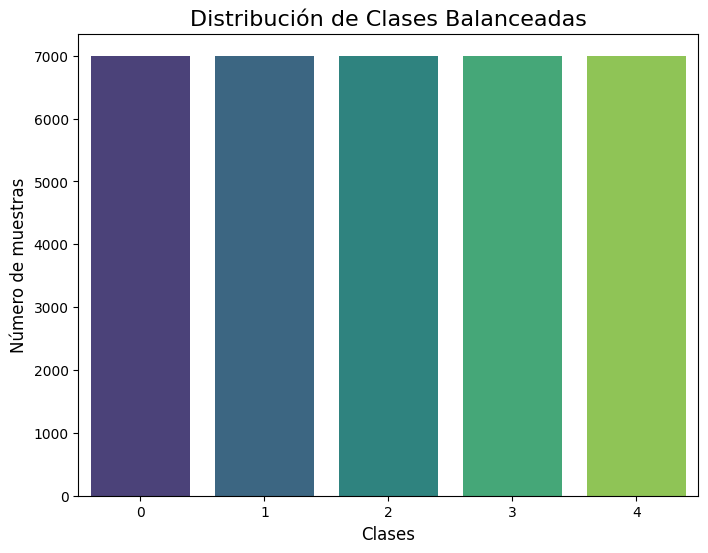

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Barplot para mostrar la distribución de clases
plt.figure(figsize=(8, 6))
sns.countplot(x='family', data=balanced_data, palette='viridis')
plt.title('Distribución de Clases Balanceadas', fontsize=16)
plt.xlabel('Clases', fontsize=12)
plt.ylabel('Número de muestras', fontsize=12)
plt.show()


Models will be:
- Random Forest
- Gradient Boosting
- KNN
- Linear Regression
- Neural Networks
- LSTM


### Random Forest

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

X = balanced_data.drop(columns=['family'])
y = balanced_data['family']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=50)

rf.fit(X_train, y_train)

y_pred_rf = classif.predict(X_test)

In [40]:
print(f"The score of the algorithm: {classif.score(X_test,y_test)*100}")

The score of the algorithm: 98.88571428571429


In [41]:
cm = confusion_matrix(y_test, y_pred_rf)
cm

array([[1433,    0,    1,    0,    0],
       [   0, 1397,   11,    0,   12],
       [   1,   13, 1393,    5,    3],
       [   0,    5,   18, 1341,    1],
       [   0,    6,    2,    0, 1358]])

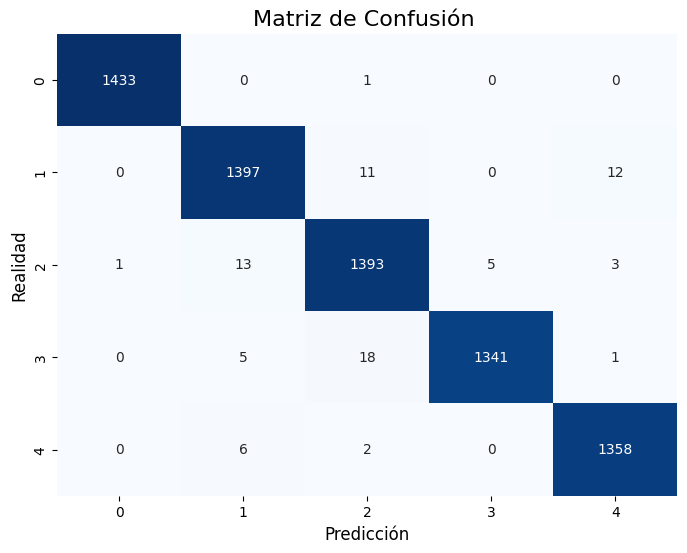

In [42]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=balanced_data['family'].unique(), yticklabels=balanced_data['family'].unique(), cbar=False)
plt.title('Matriz de Confusión ', fontsize=16)
plt.xlabel('Predicción', fontsize=12)
plt.ylabel('Realidad', fontsize=12)
plt.show()

In [43]:
classification_report(y_test, y_pred_rf)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1434\n           1       0.98      0.98      0.98      1420\n           2       0.98      0.98      0.98      1415\n           3       1.00      0.98      0.99      1365\n           4       0.99      0.99      0.99      1366\n\n    accuracy                           0.99      7000\n   macro avg       0.99      0.99      0.99      7000\nweighted avg       0.99      0.99      0.99      7000\n'

In [44]:
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='macro')  # Puedes usar 'micro', 'macro', 'weighted' 
recall = recall_score(y_test, y_pred_rf, average='macro')
f1 = f1_score(y_test, y_pred_rf, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9889
Precision: 0.9889
Recall: 0.9888
F1 Score: 0.9889


In [45]:
import joblib  
joblib.dump(rf, "models/MalDist_rf_osss_.pkl")

['models/MalDist_rf_osss_.pkl']

### Extratree classifier

In [46]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

extratrees = ExtraTreesClassifier().fit(X, y)
select = SelectFromModel(extratrees, prefit=True)
data_in_new = select.transform(X)

print(X.shape, data_in_new.shape)

(35000, 334) (35000, 95)


/home/fingopolo/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [47]:
features = data_in_new.shape[1]
importances = extratrees.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(features):
    print(f"{f+1}, {data.columns[2+indices[f]]}, {importances[indices[f]]}")

1, packet_0_protocol_8, 0.03480208809708146
2, packet_0_protocol_3, 0.025204288591953103
3, packet_7_protocol_8, 0.021570662995518707
4, packet_8_protocol_8, 0.017553718688785743
5, stat_3, 0.017167263708201885
6, packet_2_protocol_8, 0.01610062826114676
7, packet_6_protocol_8, 0.01608288204758282
8, packet_3_protocol_8, 0.015999021220850958
9, packet_5_protocol_8, 0.015891094076364517
10, packet_5_protocol_2, 0.015012639012081323
11, packet_3_protocol_5, 0.014924018869984776
12, packet_4_protocol_6, 0.014597937949175634
13, packet_6_protocol_7, 0.01398093810943151
14, packet_3_protocol_2, 0.013246519159624125
15, packet_3_protocol_3, 0.013168913635941913
16, packet_4_protocol_5, 0.013022282688761332
17, stat_2, 0.012562237735595616
18, packet_2_protocol_3, 0.011730901250033565
19, packet_7_protocol_5, 0.011450691267906345
20, packet_1_protocol_8, 0.01144479853065004
21, stat_0, 0.010433595892023351
22, packet_0_protocol_5, 0.010129739398961985
23, packet_1_protocol_6, 0.00984629513702

In [50]:
X_train_extree, X_test_extree, y_train_extree, y_test_extree = train_test_split(data_in_new, y, test_size=0.2, random_state=42)
rf_extree = RandomForestClassifier(n_estimators=50)

rf_extree.fit(X_train_extree, y_train_extree)

y_pred_extree = rf_extree.predict(X_test_extree)

In [51]:
print(f"The score of the algorithm: {rf_extree.score(X_test_extree,y_test_extree)*100}")

The score of the algorithm: 98.85714285714286


In [52]:
cm = confusion_matrix(y_test_extree, y_pred_extree)
cm

array([[1434,    0,    0,    0,    0],
       [   0, 1394,   11,    0,   15],
       [   1,   13, 1391,    4,    6],
       [   0,    3,   18, 1344,    0],
       [   0,    9,    0,    0, 1357]])

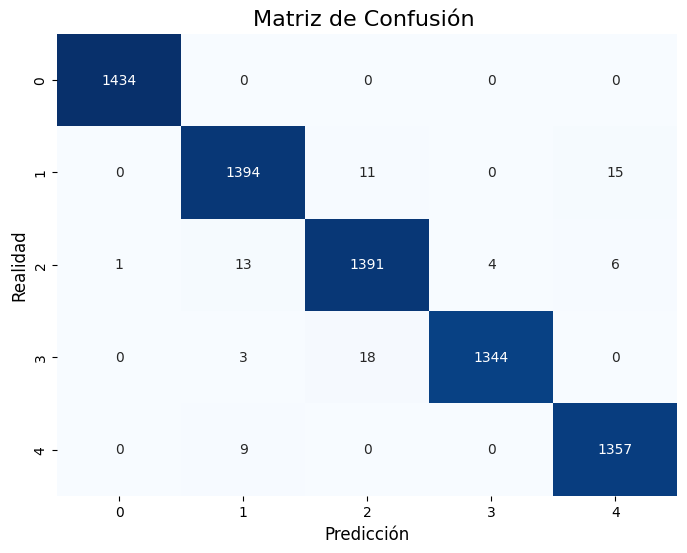

In [53]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=balanced_data['family'].unique(), yticklabels=balanced_data['family'].unique(), cbar=False)
plt.title('Matriz de Confusión ', fontsize=16)
plt.xlabel('Predicción', fontsize=12)
plt.ylabel('Realidad', fontsize=12)
plt.show()

In [54]:
classification_report(y_test_extree, y_pred_extree)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1434\n           1       0.98      0.98      0.98      1420\n           2       0.98      0.98      0.98      1415\n           3       1.00      0.98      0.99      1365\n           4       0.98      0.99      0.99      1366\n\n    accuracy                           0.99      7000\n   macro avg       0.99      0.99      0.99      7000\nweighted avg       0.99      0.99      0.99      7000\n'

In [55]:
accuracy = accuracy_score(y_test_extree, y_pred_extree)
precision = precision_score(y_test_extree, y_pred_extree, average='macro')  # Puedes usar 'micro', 'macro', 'weighted' 
recall = recall_score(y_test_extree, y_pred_extree, average='macro')
f1 = f1_score(y_test_extree, y_pred_extree, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9886
Precision: 0.9886
Recall: 0.9886
F1 Score: 0.9886


In [56]:
joblib.dump(rf_extree, "models/MalDist_extree_osss_.pkl")

['models/MalDist_extree_osss_.pkl']

### Gradient Boosting (XGBoost)

In [22]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 1.2 MB/s eta 0:00:0000:0100:05m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 MB 1.1 MB/s eta 0:00:0000:0100:05

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [23]:
from xgboost import XGBClassifier

# Crear y entrenar el modelo de Gradient Boosting
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb.fit(X_train, y_train)

# Predecir y evaluar
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Classifier")
print(classification_report(y_test, y_pred_xgb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")

XGBoost Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1434
           1       0.97      0.98      0.98      1420
           2       0.98      0.99      0.98      1415
           3       1.00      0.98      0.99      1365
           4       0.98      0.98      0.98      1366

    accuracy                           0.99      7000
   macro avg       0.99      0.99      0.99      7000
weighted avg       0.99      0.99      0.99      7000

Accuracy: 0.9860


In [31]:
print(f"The score of the algorithm: {xgb.score(X_test,y_test)*100}")

The score of the algorithm: 98.6


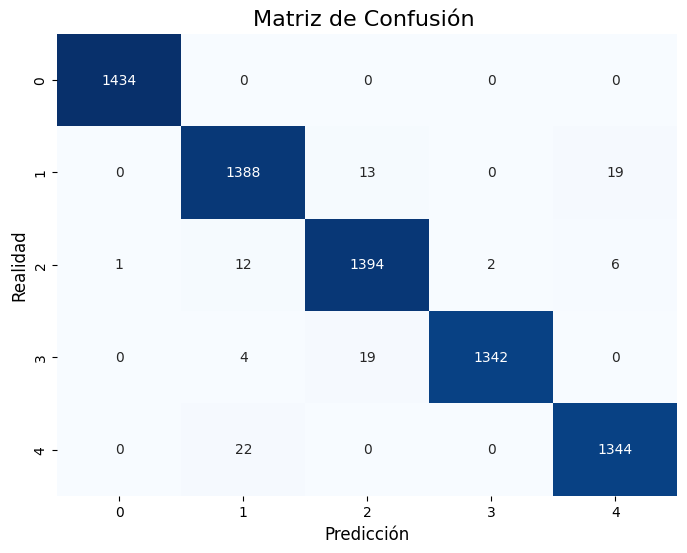

In [35]:
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=balanced_data['family'].unique(), yticklabels=balanced_data['family'].unique(), cbar=False)
plt.title('Matriz de Confusión ', fontsize=16)
plt.xlabel('Predicción', fontsize=12)
plt.ylabel('Realidad', fontsize=12)
plt.show()

In [24]:
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb, average='macro')  # Puedes usar 'micro', 'macro', 'weighted' 
recall = recall_score(y_test, y_pred_xgb, average='macro')
f1 = f1_score(y_test, y_pred_xgb, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9860
Precision: 0.9861
Recall: 0.9859
F1 Score: 0.9860


In [32]:
joblib.dump(xgb, "models/MalDist_xgb_osss_.pkl")

['models/MalDist_xgb_osss_.pkl']

### KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier

# Crear y entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

# Predecir y evaluar
y_pred_knn = knn.predict(X_test)

print("K-Nearest Neighbors")
print(classification_report(y_test, y_pred_knn))
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")

K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1434
           1       0.91      0.95      0.93      1420
           2       0.96      0.87      0.91      1415
           3       0.99      0.96      0.97      1365
           4       0.92      0.98      0.95      1366

    accuracy                           0.95      7000
   macro avg       0.95      0.95      0.95      7000
weighted avg       0.95      0.95      0.95      7000

Accuracy: 0.9456


In [34]:
print(f"The score of the algorithm: {knn.score(X_test,y_test)*100}")

The score of the algorithm: 94.55714285714286


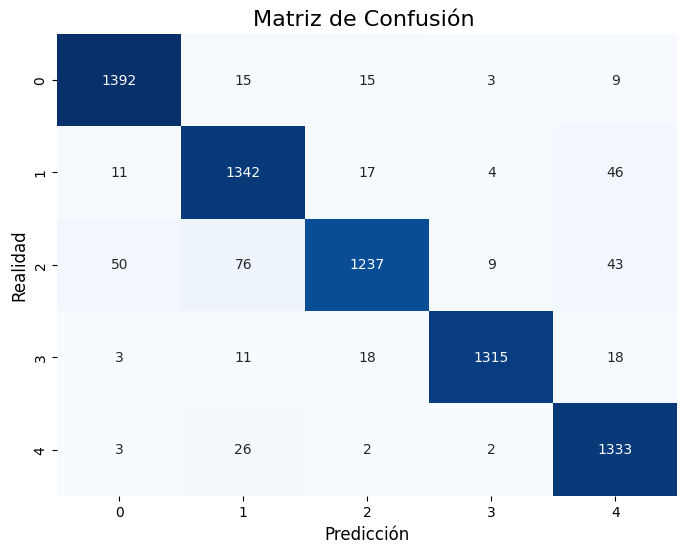

In [36]:
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=balanced_data['family'].unique(), yticklabels=balanced_data['family'].unique(), cbar=False)
plt.title('Matriz de Confusión ', fontsize=16)
plt.xlabel('Predicción', fontsize=12)
plt.ylabel('Realidad', fontsize=12)
plt.show()

In [37]:
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='macro')  # Puedes usar 'micro', 'macro', 'weighted' 
recall = recall_score(y_test, y_pred_knn, average='macro')
f1 = f1_score(y_test, y_pred_knn, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9456
Precision: 0.9466
Recall: 0.9458
F1 Score: 0.9456


In [61]:
joblib.dump(knn, "models/MalDist_knn_osss_.pkl")

['models/MalDist_knn_osss_.pkl']

### Logistic Regresion

In [57]:
from sklearn.linear_model import LogisticRegression

# Crear y entrenar el modelo de Regresión Lineal
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predecir y evaluar
y_pred_log_reg = log_reg.predict(X_test)

print("Logistic Regression")
print(classification_report(y_test, y_pred_log_reg))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")

Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1434
           1       0.81      0.83      0.82      1420
           2       0.85      0.80      0.83      1415
           3       0.92      0.95      0.93      1365
           4       0.81      0.84      0.82      1366

    accuracy                           0.86      7000
   macro avg       0.86      0.86      0.86      7000
weighted avg       0.86      0.86      0.86      7000

Accuracy: 0.8597


/home/fingopolo/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
print(f"The score of the algorithm: {log_reg.score(X_test,y_test)*100}")

The score of the algorithm: 85.97142857142858


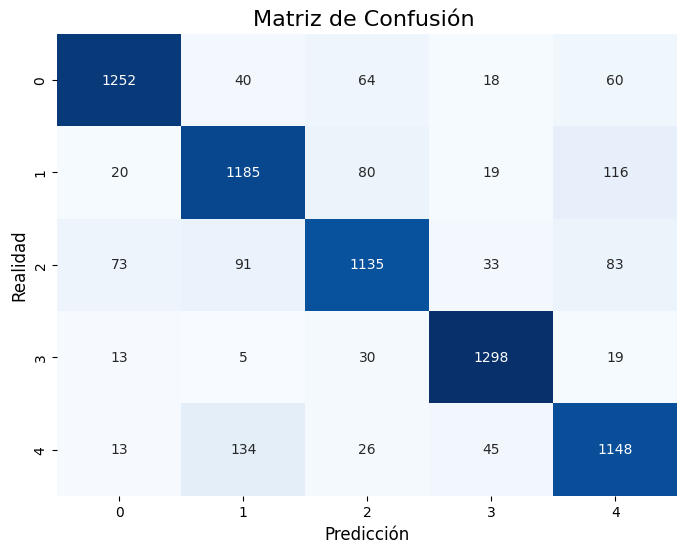

In [59]:
cm = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=balanced_data['family'].unique(), yticklabels=balanced_data['family'].unique(), cbar=False)
plt.title('Matriz de Confusión ', fontsize=16)
plt.xlabel('Predicción', fontsize=12)
plt.ylabel('Realidad', fontsize=12)
plt.show()

In [60]:
accuracy = accuracy_score(y_test, y_pred_log_reg)
precision = precision_score(y_test, y_pred_log_reg, average='macro')  # Puedes usar 'micro', 'macro', 'weighted' 
recall = recall_score(y_test, y_pred_log_reg, average='macro')
f1 = f1_score(y_test, y_pred_log_reg, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8597
Precision: 0.8603
Recall: 0.8602
F1 Score: 0.8599


In [62]:
joblib.dump(log_reg, "models/MalDist_logreg_osss_.pkl")

['models/MalDist_logreg_osss_.pkl']

### Neural Networks (MLP - Multi-layer Perceptron)

In [63]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo de red neuronal
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, activation='relu', solver='adam', random_state=42)
mlp.fit(X_train_scaled, y_train)

# Predecir y evaluar
y_pred_mlp = mlp.predict(X_test_scaled)

print("MLP Classifier")
print(classification_report(y_test, y_pred_mlp))
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp):.4f}")

MLP Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1434
           1       0.96      0.97      0.96      1420
           2       0.97      0.96      0.96      1415
           3       0.99      0.98      0.98      1365
           4       0.97      0.97      0.97      1366

    accuracy                           0.97      7000
   macro avg       0.97      0.97      0.97      7000
weighted avg       0.97      0.97      0.97      7000

Accuracy: 0.9749


In [64]:
print(f"The score of the algorithm: {mlp.score(X_test_scaled,y_test)*100}")

The score of the algorithm: 97.48571428571428


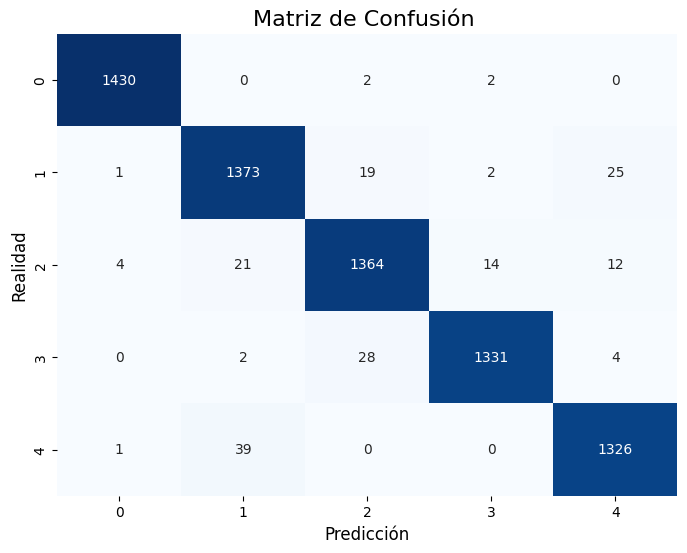

In [66]:
cm = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=balanced_data['family'].unique(), yticklabels=balanced_data['family'].unique(), cbar=False)
plt.title('Matriz de Confusión ', fontsize=16)
plt.xlabel('Predicción', fontsize=12)
plt.ylabel('Realidad', fontsize=12)
plt.show()

In [67]:
accuracy = accuracy_score(y_test, y_pred_mlp)
precision = precision_score(y_test, y_pred_mlp, average='macro')  # Puedes usar 'micro', 'macro', 'weighted' 
recall = recall_score(y_test, y_pred_mlp, average='macro')
f1 = f1_score(y_test, y_pred_mlp, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9749
Precision: 0.9749
Recall: 0.9748
F1 Score: 0.9748


In [68]:
joblib.dump(mlp, "models/MalDist_mlp_osss_.pkl")

['models/MalDist_mlp_osss_.pkl']